In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from pickle import load,dump
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [2]:
train_input, train_target = np.load("train_data.npz")["inputs"], np.load("train_data.npz")["target"]
valid_input, valid_target = np.load("valid_data.npz")["inputs"], np.load("valid_data.npz")["target"]
test_input, test_target = np.load("test_data.npz")["inputs"], np.load("test_data.npz")["target"]
print("train shape : {}, valid shape : {}, test shape : {} ".format(train_input.shape, valid_input.shape, test_target.shape))

train shape : (1456, 27), valid shape : (182, 27), test shape : (262, 1) 


In [3]:
#loading three models
svm_1_model = load(open("most_acc_sv_classifier","rb"))
svm_2_model = load(open("svm_zero_classifier","rb"))
LR_1_model = load(open("most_acc_logistic_classifier","rb"))
LR_2_model = load(open("cv_logistic_classifier","rb"))
gnb_model = load(open("most_acc_nb_classifier","rb"))
forrest_model = load(open("most_acc_rforrest_classifier","rb"))

In [4]:
#SVM Prediction
#Using probability for label 1 (above 2.5 goals)
svm1_binary_pred =svm_1_model.predict_proba(train_input)[:,1]
svm1_binary_pred

array([0.51750204, 0.51975923, 0.5       , ..., 0.53847967, 0.5232247 ,
       0.51489002])

In [5]:
svm_1_model.predict(train_input)

array([1., 1., 0., ..., 1., 1., 1.])

In [6]:
svm2_binary_pred =svm_2_model.predict_proba(train_input)[:,1]
svm2_binary_pred

array([0.4809174 , 0.53810479, 0.45366306, ..., 0.592315  , 0.5941689 ,
       0.43124671])

In [7]:
#Logistic Regression Prediction
#Using probability for label 1 (above 2.5 goals)
LR1_binary_pred = LR_1_model.predict_proba(train_input)[:,1]
LR1_binary_pred

array([0.4975526 , 0.59289396, 0.41805203, ..., 0.61102244, 0.62358046,
       0.4207685 ])

In [8]:
LR_1_model.predict(train_input)

array([0., 1., 0., ..., 1., 1., 0.])

In [9]:
LR2_binary_pred = LR_2_model.predict_proba(train_input)[:,1]
LR2_binary_pred

array([0.49427791, 0.58924159, 0.42264706, ..., 0.6089223 , 0.6237156 ,
       0.42247567])

In [10]:
gnb_binary_pred = gnb_model.predict_proba(train_input)[:,1]
gnb_binary_pred

array([0.25666939, 0.54934764, 0.17614941, ..., 0.9983794 , 0.95476854,
       0.17427282])

In [11]:
forrest_binary_pred = forrest_model.predict_proba(train_input)[:,1]
forrest_binary_pred

array([0.77933673, 0.20535714, 0.77423469, ..., 0.83163265, 0.20918367,
       0.81760204])

In [12]:
training_ensemble_set = pd.DataFrame(data = {"svm1_pred" : svm1_binary_pred, "svm2_pred" : svm2_binary_pred, 
                                             "LR1_pred" : LR1_binary_pred, "LR2_pred":LR2_binary_pred,
                                             "GNB_pred" : gnb_binary_pred, "Forrest_pred" : forrest_binary_pred,
                                             "Target": train_target.reshape(-1)})



In [13]:
training_ensemble_set.head()

,svm1_pred,svm2_pred,LR1_pred,LR2_pred,GNB_pred,Forrest_pred,Target
0,0.517502,0.480917,0.497553,0.494278,0.256669,0.779337,1.0
1,0.519759,0.538105,0.592894,0.589242,0.549348,0.205357,0.0
2,0.500000,0.453663,0.418052,0.422647,0.176149,0.774235,1.0
3,0.466730,0.446568,0.435512,0.429541,0.145625,0.133929,0.0
4,0.530198,0.638921,0.660799,0.661165,0.999522,0.247449,0.0


In [14]:
#Creating Validation and Test sets
svm1_binary_valid =svm_1_model.predict_proba(valid_input)[:,1]
svm1_binary_test =svm_1_model.predict_proba(test_input)[:,1]

svm2_binary_valid =svm_2_model.predict_proba(valid_input)[:,1]
svm2_binary_test =svm_2_model.predict_proba(test_input)[:,1]

LR1_binary_valid = LR_1_model.predict_proba(valid_input)[:,1]
LR1_binary_test = LR_1_model.predict_proba(test_input)[:,1]

LR2_binary_valid = LR_2_model.predict_proba(valid_input)[:,1]
LR2_binary_test = LR_2_model.predict_proba(test_input)[:,1]

gnb_binary_valid = gnb_model.predict_proba(valid_input)[:,1]
gnb_binary_test = gnb_model.predict_proba(test_input)[:,1]

forrest_binary_valid = forrest_model.predict_proba(valid_input)[:,1]
forrest_binary_test = forrest_model.predict_proba(test_input)[:,1]

validation_ensemble_set = pd.DataFrame(data = {"svm1_pred" : svm1_binary_valid, "svm2_pred" : svm2_binary_valid, 
                                             "LR1_pred" : LR1_binary_valid, "LR2_pred":LR2_binary_valid,
                                             "GNB_pred" : gnb_binary_valid, "Forrest_pred" : forrest_binary_valid,
                                             "Target": valid_target.reshape(-1)})

test_ensemble_set = pd.DataFrame(data = {"svm1_pred" : svm1_binary_test, "svm2_pred" : svm2_binary_test, 
                                             "LR1_pred" : LR1_binary_test, "LR2_pred":LR2_binary_test,
                                             "GNB_pred" : gnb_binary_test, "Forrest_pred" : forrest_binary_test,
                                             "Target": test_target.reshape(-1)})



all_predictions = pd.concat([training_ensemble_set, validation_ensemble_set, test_ensemble_set ], axis= 0).reset_index(drop= True)
all_predictions

,svm1_pred,svm2_pred,LR1_pred,LR2_pred,GNB_pred,Forrest_pred,Target
0,0.517502,0.480917,0.497553,0.494278,0.256669,0.779337,1.0
1,0.519759,0.538105,0.592894,0.589242,0.549348,0.205357,0.0
2,0.500000,0.453663,0.418052,0.422647,0.176149,0.774235,1.0
3,0.466730,0.446568,0.435512,0.429541,0.145625,0.133929,0.0
4,0.530198,0.638921,0.660799,0.661165,0.999522,0.247449,0.0
5,0.523161,0.549415,0.604915,0.597704,0.733958,0.844388,1.0
6,0.513158,0.623184,0.670904,0.664280,0.999129,0.784439,1.0
7,0.538458,0.610570,0.700033,0.693750,0.986071,0.867347,1.0
8,0.477949,0.455649,0.435710,0.433850,0.199690,0.751276,1.0
9,0.516398,0.483123,0.468244,0.471773,0.173436,0.811224,1.0


In [15]:
predicts_input_e = all_predictions.drop("Target",axis=1).to_numpy()
predicts_target_e =  all_predictions["Target"].to_numpy()
predicts_input_e

array([[0.51750204, 0.4809174 , 0.4975526 , 0.49427791, 0.25666939,
        0.77933673],
       [0.51975923, 0.53810479, 0.59289396, 0.58924159, 0.54934764,
        0.20535714],
       [0.5       , 0.45366306, 0.41805203, 0.42264706, 0.17614941,
        0.77423469],
       ...,
       [0.4887879 , 0.47167395, 0.52739087, 0.51952438, 0.13686076,
        0.43239796],
       [0.5       , 0.49279449, 0.52084952, 0.52128272, 0.27113528,
        0.54464286],
       [0.4827777 , 0.47112049, 0.48478328, 0.48737997, 0.31682662,
        0.56887755]])

In [16]:
train_i, test_i, train_t, test_t = train_test_split(predicts_input_e, predicts_target_e,  test_size = 0.2, train_size = 0.8, random_state = 42, shuffle= True  ) 

train_i.shape, test_i.shape,

((1520, 6), (380, 6))

In [18]:
ensemble_clf =  LogisticRegression()
ensemble_clf.fit(train_i, train_t)
train_score = ensemble_clf.score(train_i, train_t)
test_score = ensemble_clf.score(test_i, test_t)

print(f"Train Score = {train_score}, Test Score = {test_score} ")

Train Score = 0.9052631578947369, Test Score = 0.881578947368421 


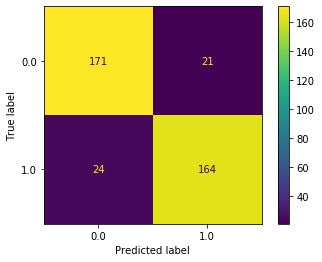

In [19]:
plot_confusion_matrix( ensemble_clf, 
                      test_i, 
                      test_t,
                      values_format = "d"
)


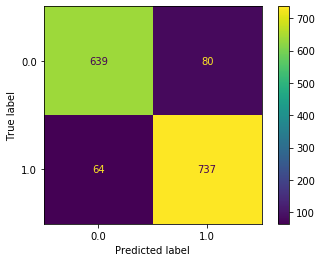

In [20]:
plot_confusion_matrix( ensemble_clf, 
                      train_i, 
                      train_t,
                      values_format = "d"
)


<Figure size 7200x5040 with 0 Axes>

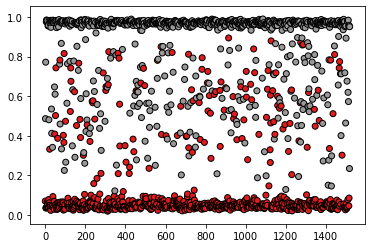

<Figure size 7200x5040 with 0 Axes>

In [21]:
ensemble_prob_train = ensemble_clf.predict_proba(train_i)[:,1]
plt.scatter(np.arange(ensemble_prob_train.shape[0]), ensemble_prob_train, c=train_t, cmap=plt.cm.Set1,
            edgecolor='k')
plt.figure(2, figsize=(100, 70))

In [22]:
#dump(ensemble_clf,open("ensemble_clf","wb"))


## Ensemble From Log Losses 

In [35]:
def logloss(true_label, predicted, eps=1e-15):
  p = np.clip(predicted, eps, 1 - eps)
  if true_label == 1:
    return -np.log(p)
  else:
    return -np.log(1 - p)

In [52]:
log_loss_pred =  all_predictions.iloc[:,:6]*0
log_loss_pred["Targets"] = all_predictions["Target"]
indexs, features = log_loss_pred.shape
indexs,features

(1900, 7)

In [60]:
columns = log_loss_pred.columns
for column in range(features-1):   
    scalars = []
    for index in range(indexs):
        scalars.append(logloss( all_predictions.iloc[ index, 6 ],
                               all_predictions.iloc[ index, column ]
                              ))
    log_loss_pred[columns[column]] = scalars

In [61]:
log_loss_pred 

,svm1_pred,svm2_pred,LR1_pred,LR2_pred,GNB_pred,Forrest_pred,Targets
0,0.658742,0.732060,0.698054,0.704657,1.359966e+00,0.249312,1.0
1,0.733468,0.772417,0.898682,0.889750,7.970591e-01,0.229863,0.0
2,0.693147,0.790401,0.872149,0.861218,1.736423e+00,0.255880,1.0
3,0.628727,0.591617,0.571835,0.561313,1.573846e-01,0.143788,0.0
4,0.755444,1.018658,1.081163,1.082242,7.645407e+00,0.284286,0.0
5,0.647866,0.598902,0.502667,0.514659,3.093036e-01,0.169143,1.0
6,0.667172,0.472913,0.399129,0.409051,8.714488e-04,0.242787,1.0
7,0.619046,0.493363,0.356628,0.365644,1.402702e-02,0.142316,1.0
8,0.738251,0.786031,0.830779,0.835056,1.610989e+00,0.285983,1.0
9,0.660877,0.727484,0.758767,0.751258,1.751948e+00,0.209210,1.0


In [63]:
predicts_input = log_loss_pred.drop("Targets",axis=1).to_numpy()
predicts_target =  log_loss_pred["Targets"].to_numpy()
predicts_input

array([[0.65874182, 0.73205975, 0.698054  , 0.70465735, 1.35996646,
        0.24931206],
       [0.7334677 , 0.77241724, 0.89868158, 0.88975004, 0.79705906,
        0.2298625 ],
       [0.69314718, 0.79040051, 0.87214937, 0.86121781, 1.73642272,
        0.25588023],
       ...,
       [0.67097071, 0.63804168, 0.74948659, 0.73297879, 0.14717926,
        0.56633474],
       [0.69314718, 0.67883901, 0.73574057, 0.73664508, 0.31626714,
        0.78667324],
       [0.65928253, 0.63699464, 0.66316765, 0.66822039, 0.3810066 ,
        0.84136312]])

In [99]:
train_l_i, test_l_i, train_l_t, test_l_t = train_test_split(predicts_input, predicts_target,  test_size = 0.2, train_size = 0.8, random_state = 42, shuffle= True  ) 

train_l_i.shape, test_l_i.shape,

((1520, 6), (380, 6))

In [100]:
ensemble_clf_log =  LogisticRegression()
ensemble_clf_log.fit(train_l_i, train_l_t)
train_score = ensemble_clf_log.score(train_l_i, train_l_t)
test_score = ensemble_clf_log.score(test_l_i, test_l_t)

print(f"Train Score = {train_score}, Test Score = {test_score} ")

Train Score = 0.5809210526315789, Test Score = 0.5947368421052631 


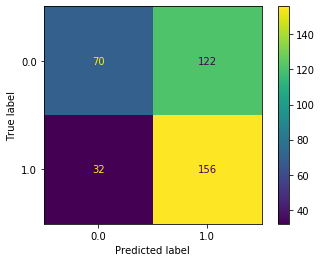

In [101]:
plot_confusion_matrix( ensemble_clf_log, 
                      test_l_i, 
                      test_l_t,
                      values_format = "d"
)


In [102]:
70/102, 156/278

(0.6862745098039216, 0.5611510791366906)

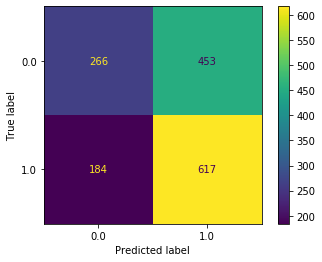

In [103]:
plot_confusion_matrix( ensemble_clf_log, 
                      train_l_i, 
                      train_l_t,
                      values_format = "d"
)


In [104]:
266/(266+184), 617/(453+617)

(0.5911111111111111, 0.5766355140186916)

In [109]:
#dump(ensemble_clf_log,open("ensemble_clf_log","wb"))